# Proyek Analisis Data: Nama dataset
- Nama: Karna Mandarawata
- Email: karna.mandara@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- 1 Barang apa yang paling banyak terjual
- 2. most Payment type used 


## Menyaipkan semua library yang dibuthkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np


## Data Wrangling

### Gathering Data, Assesing, cleaning

In [60]:
#cek customers data
customers_df = pd.read_csv("data/customers_dataset.csv")
#load table 
customers_df.head()
#show info 
customers_df.info()
#check missing values in the dataset
customers_df.isnull().sum()
#chcek duplicated
customers_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


0

In [57]:
#cek geolocation 

cs_geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
cs_geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [18]:

#cek order 
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
#cek order reviews
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
#cek product
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [61]:
#cek seller
sellers_df = pd.read_csv("data/sellers_dataset.csv")
#show table
sellers_df.head()
#show info
sellers_df.info()
#cek duplicate
sellers_df.duplicated().sum()
#check missing values 
sellers_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [23]:
#cek order items
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data and ## Exploratory Data Analysis (EDA)

In [105]:
customers_df = pd.read_csv("data/customers_dataset.csv")
orders_data_df = pd.read_csv("data/orders_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
products_df = pd.read_csv("data/products_dataset.csv")
products_en_df = pd.read_csv("data/product_category_name_translation.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
join_cs_df = pd.merge(
    left=customers_df,
    right=orders_data_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

join_cs_df = pd.merge(
    left=join_cs_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

join_cs_df = pd.merge(
left= join_cs_df,
right=products_df,
how="inner",
left_on="product_id",
right_on="product_id"

)
join_cs_df = pd.merge(
left= join_cs_df,
right=products_en_df,
how="inner",
left_on="product_category_name",
right_on="product_category_name"

)
join_cs_df = pd.merge(
left= join_cs_df,
right=order_payments_df,
how="inner",
left_on="order_id",
right_on="order_id"

)
selected_columns = ['customer_id','order_id','payment_type','order_status','order_approved_at','customer_city','product_id','product_category_name_english','product_category_name','seller_id','price','freight_value']
selected_cs_df = join_cs_df[selected_columns]

selected_cs_df.head()

# print("duplicated data on orders items: ",orders_items_df.duplicated().sum())
# print("duplicated data on orders items: ",orders_data_df.duplicated().sum())

#customers_df.info()

#order_items_df.isna().sum()



most_sold_item = join_cs_df.groupby(['order_approved_at','product_category_name_english']).size().reset_index(name='count')

most_sold_item_per_date = most_sold_item.loc[most_sold_item.groupby('order_approved_at')['count'].idxmax()]
most_sold_item_per_date['order_approved_at'] = pd.to_datetime(most_sold_item_per_date['order_approved_at'])
most_sold_item_per_date['date_only'] = most_sold_item_per_date['order_approved_at'].dt.date


grouped_by_date_item = most_sold_item_per_date.groupby(['product_category_name_english','date_only'])['count'].sum().reset_index(name='total_count')

grouped_by_month_item = grouped_by_date_item.copy() 
grouped_by_month_item['date_only'] = pd.to_datetime(grouped_by_month_item['date_only']) 

grouped_by_month_item['month_year'] = grouped_by_month_item['date_only'].dt.to_period('M')

grouped_by_month = grouped_by_month_item.groupby(['product_category_name_english','month_year'])['total_count'].sum().reset_index(name='total_count')

grouped_by_month.head()
# most_sold_item_per_date.head()
# most_sold_seller = join_cs_df['seller_id'].value_counts().idxmax()
# print("Paling banyak terjual", most_sold_item)
# print("Seller paling banyak penjualan", most_sold_seller)
#

# Assuming 'most_sold_items_per_date' has the 'order_date', 'item_name', and 'count' columns
# and you want to find the most sold item for each month

most_sold_item_per_date['order_approved_at'] = pd.to_datetime(most_sold_item_per_date['order_approved_at'])
most_sold_item_per_date['month'] = most_sold_item_per_date['order_approved_at'].dt.to_period('M')

# Group by month and item_name, and find the most sold item for each month
most_sold_items_by_month = most_sold_item_per_date.groupby(['month', 'product_category_name_english'])['count'].sum().reset_index(name='total_count')
most_sold_items_by_month = most_sold_items_by_month.loc[most_sold_items_by_month.groupby('month')['total_count'].idxmax()]

# Showing per month sale on product
most_sold_items_by_month.head()

most_sold_items_by_month.to_csv("dashboard/most_sold_items_by_month.csv")








In [106]:
most_sold_item_per_date['order_approved_at'] = pd.to_datetime(most_sold_item_per_date['order_approved_at'])
most_sold_item_per_date['year'] = most_sold_item_per_date['order_approved_at'].dt.to_period('Y')

# Group by year and item_name, and find the most sold item for each year
most_sold_items_by_year = most_sold_item_per_date.groupby(['year', 'product_category_name_english'])['count'].sum().reset_index(name='total_count')
most_sold_items_by_year = most_sold_items_by_year.loc[most_sold_items_by_year.groupby('year')['total_count'].idxmax()]
# showing per year sale on product 

most_sold_items_by_year.head()
most_sold_items_by_year.to_csv("dashboard/most_sold_items_by_year.csv")

In [97]:
item_counts = join_cs_df['product_category_name_english'].value_counts()
seller_counts = join_cs_df['seller_id'].value_counts()
custermer_city_counts = join_cs_df['customer_city'].value_counts()
payment_type = join_cs_df['payment_type'].value_counts()
#buat dataframe dengan item_counts
item_counts_df = pd.DataFrame({'product_category_name_english':item_counts.index,'count':item_counts.values})
seller_count_df = pd.DataFrame({'seller_id':seller_counts.index,'count':seller_counts.values})
custermer_city_counts_df = pd.DataFrame({'customer_city':custermer_city_counts.index,'count':custermer_city_counts.values})
payment_type_df = pd.DataFrame({'payment_type':payment_type.index,'count':payment_type.values})

#buat kolom baru dengan ranking dari count 

item_counts_df['rank'] = item_counts_df['count'].rank(ascending=False,method='dense')
seller_count_df['rank'] = seller_count_df['count'].rank(ascending=False,method='dense')
custermer_city_counts_df['rank'] = custermer_city_counts_df['count'].rank(ascending=False,method='dense')
payment_type_df['rank'] = payment_type_df['count'].rank(ascending=False,method='dense')
#liat ranking item yang paling banyak terjual 

print(item_counts_df.sort_values(by='rank').head())
print(seller_count_df.sort_values(by='rank').head())
print(custermer_city_counts_df.sort_values(by='rank').head())
print(payment_type_df.sort_values(by='rank').head())

  product_category_name_english  count  rank
0                bed_bath_table  11823   1.0
1                 health_beauty   9972   2.0
2                sports_leisure   8945   3.0
3               furniture_decor   8744   4.0
4         computers_accessories   8082   5.0
                          seller_id  count  rank
0  4a3ca9315b744ce9f8e9374361493884   2133   1.0
1  6560211a19b47992c3666cc44a7e94c0   2122   2.0
2  1f50f920176fa81dab994f9023523100   2008   3.0
3  cc419e0650a3c5ba77189a1882b7556a   1847   4.0
4  da8622b14eb17ae2831f4ac5b9dab84a   1639   5.0
    customer_city  count  rank
0       sao paulo  18277   1.0
1  rio de janeiro   8066   2.0
2  belo horizonte   3191   3.0
3        brasilia   2425   4.0
4        curitiba   1792   5.0
  payment_type  count  rank
0  credit_card  85523   1.0
1       boleto  22542   2.0
2      voucher   6155   3.0
3   debit_card   1658   4.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

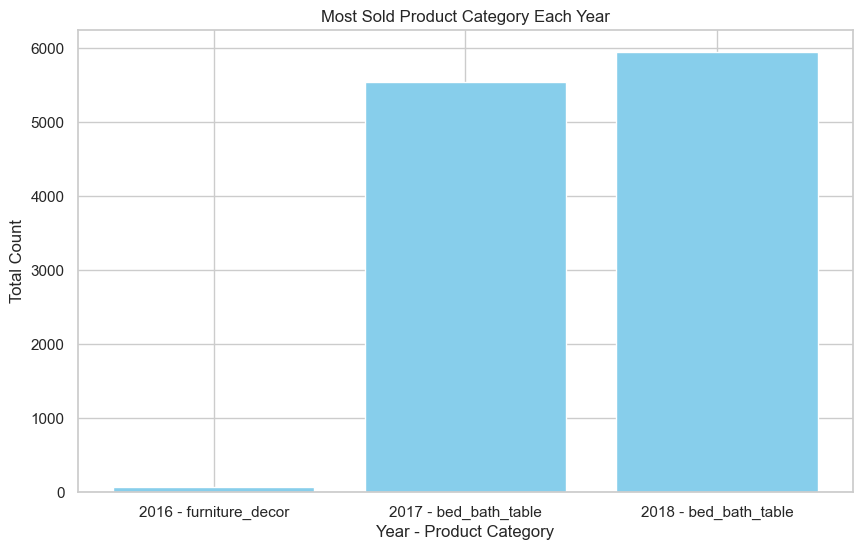

In [100]:
df = pd.DataFrame(most_sold_items_by_year)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['year'].astype(str) + ' - ' + df['product_category_name_english'], df['total_count'], color='skyblue')
plt.xlabel('Year - Product Category')
plt.ylabel('Total Count')
plt.title('Most Sold Product Category Each Year')
plt.show()

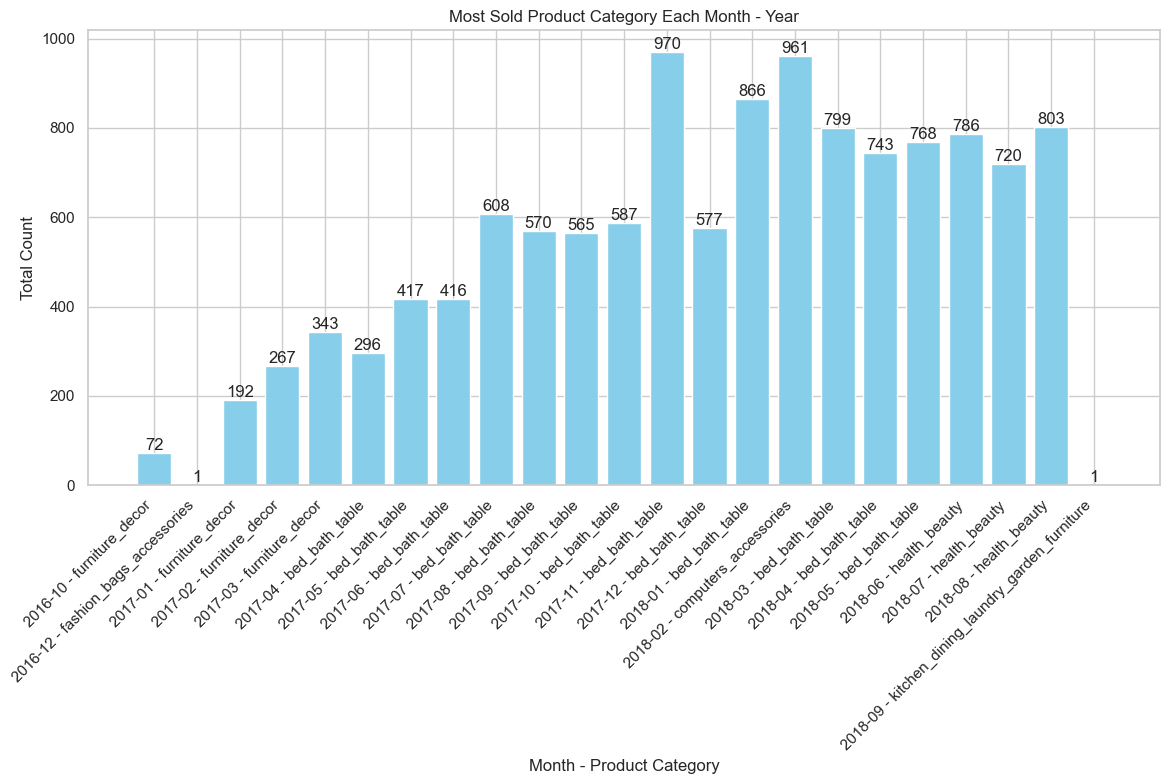

In [103]:
# Create a bar chart
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(df['month'].astype(str) + ' - ' + df['product_category_name_english'], df['total_count'], color='skyblue')

# Format x-axis ticks and labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month - Product Category')
plt.ylabel('Total Count')
plt.title('Most Sold Product Category Each Month - Year')

# Add data labels on top of the bars
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pertanyaan 2: 

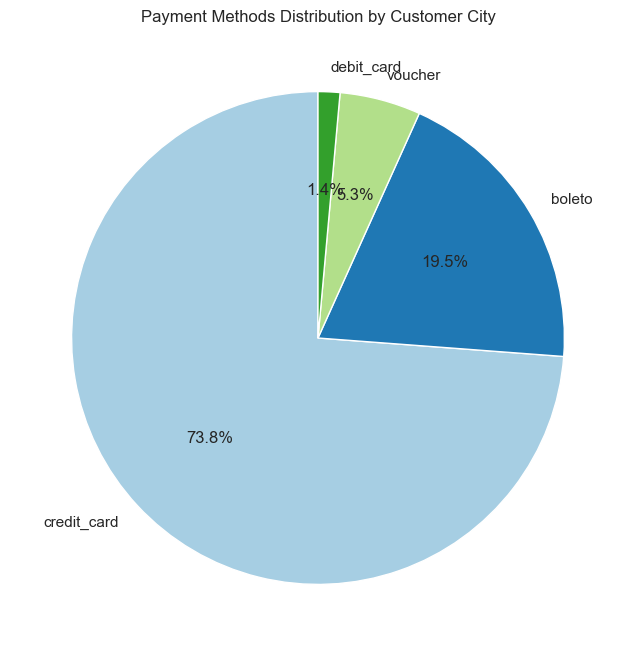

In [104]:


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_type_df['count'], labels=payment_type_df['payment_type'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Payment Methods Distribution by Customer City')

# Show the plot
plt.show()


TypeError: no numeric data to plot

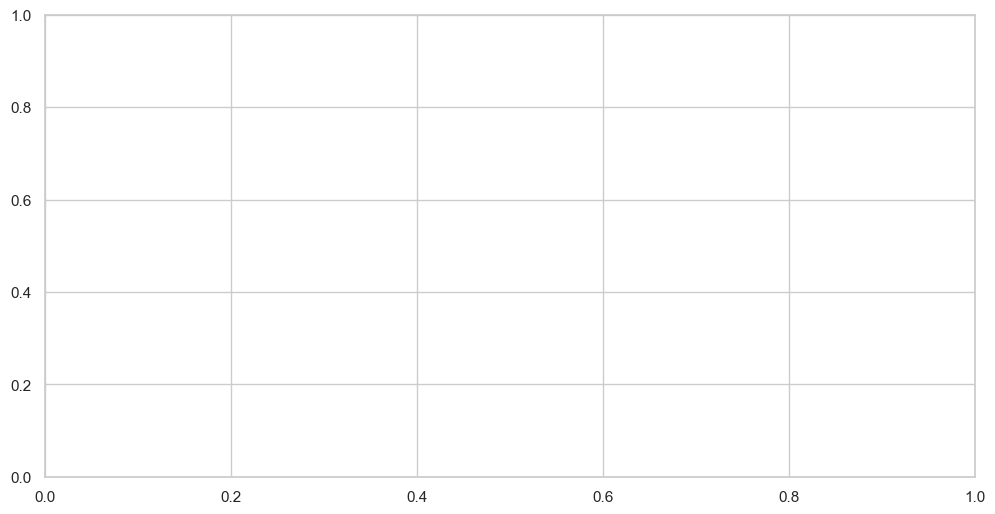

## Conclusion

- Bisa dilihat dari table jumlah penjualan bahwa di tahun 2017 dan 2018 penjualan bed_bath_table mendominasi dari penjualan yang lain namun jika di breakdown perbulan terdapat juga penjualan lain yang signifikan jumlahnya. maka bisa ditarik kesimpulan bahwa perusahaan sudah sepatutnya untuk tetap atau bisa meningkatkan produksi bed_bath_table agar bisa memenuhi permintaan pasar di tahun-tahun berikutnya.

- Agar bisa menarik dan meningkatkan loyalitas konsumen, kita bisa memberikan insentif berupa diskon kepada pengguna kartu kredit tentu dengan bekerja sama dengan pihak penyelenggara kartu kredit. 